In [1]:
pip install PyPDF2 nltk wordcloud matplotlib seaborn gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00


In [2]:
import PyPDF2

Convert PDF to Text

In [4]:
pdf_file = open('Text_Mining.pdf', 'rb')
pdf_reader = PyPDF2.PdfReader(pdf_file)

In [5]:
article_text = ''

for page_num in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[page_num]
    article_text += page.extract_text()

pdf_file.close()

Text Preprocessing

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
words = word_tokenize(article_text)

In [9]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

In [10]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

Create a Word Cloud

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
filtered_text = ' '.join(filtered_words)

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

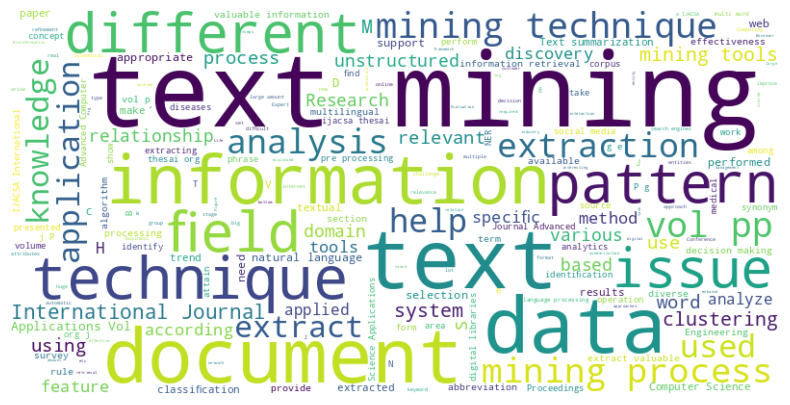

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Topic Modeling (LDA or LSI)

LDA :

In [15]:
from gensim import corpora, models

In [16]:
tokens = [filtered_text.split()]

In [17]:
dictionary = corpora.Dictionary(tokens)

In [18]:
corpus = [dictionary.doc2bow(token) for token in tokens]

In [19]:
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [20]:
for idx, topic in lda_model.print_topics():
    print(f'Topic #{idx + 1}: {topic}')

Topic #1: 0.090*"," + 0.071*"." + 0.025*"text" + 0.022*"]" + 0.022*"[" + 0.022*"mining" + 0.008*"data" + 0.008*"“" + 0.008*"information" + 0.008*"”"
Topic #2: 0.001*"," + 0.001*"." + 0.001*"[" + 0.001*"text" + 0.001*"]" + 0.001*"mining" + 0.001*"data" + 0.001*"”" + 0.001*"information" + 0.001*"("
Topic #3: 0.001*"." + 0.001*"," + 0.001*"text" + 0.001*"[" + 0.001*"mining" + 0.001*"]" + 0.001*"information" + 0.001*"(" + 0.001*"process" + 0.001*"“"
Topic #4: 0.001*"." + 0.001*"," + 0.001*"mining" + 0.001*"text" + 0.001*"[" + 0.001*"]" + 0.001*"data" + 0.001*"“" + 0.001*")" + 0.001*"("
Topic #5: 0.001*"," + 0.001*"." + 0.001*"]" + 0.001*"[" + 0.001*"text" + 0.001*"mining" + 0.001*"data" + 0.001*"“" + 0.001*"”" + 0.001*"information"


Visualize Topics LDA

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim import corpora, models

In [23]:
topics = lda_model.show_topics(formatted=False, num_topics=5)

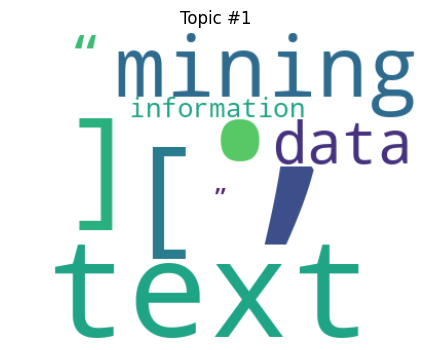

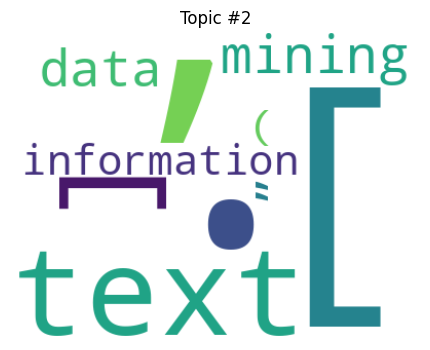

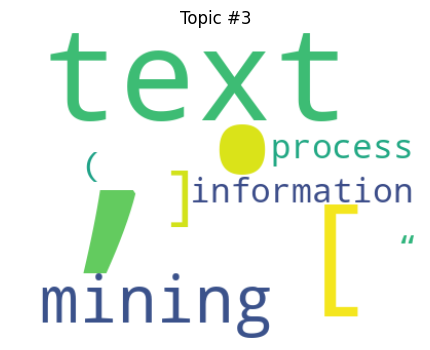

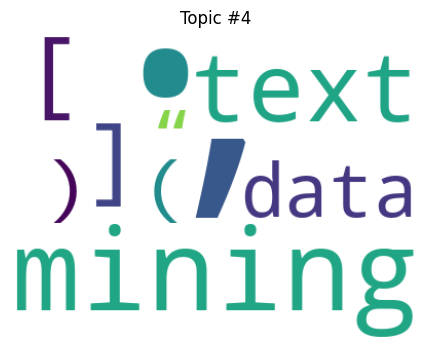

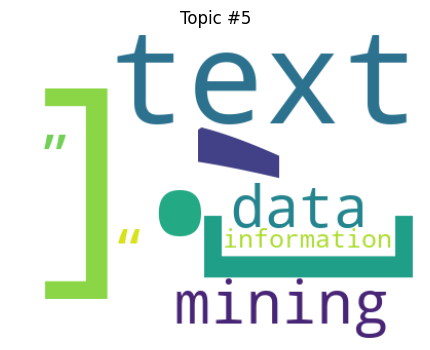

In [24]:
for topic_num, topic in topics:
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(dict(topic))

    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic #{topic_num + 1}")
    plt.axis("off")
    plt.show()

Topic Modeling (LDA or LSI)

LSI :

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora, models

In [37]:
lsi_model = models.LsiModel(corpus, id2word=dictionary, num_topics=5)
topics = lsi_model.show_topics(formatted=False, num_topics=5)

Visualize Topics LSI

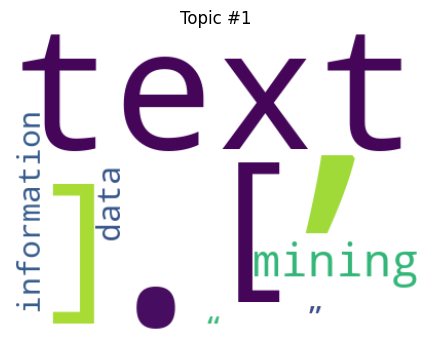

In [38]:
for topic_num, topic in topics:
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(dict(topic))

    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic #{topic_num + 1}")
    plt.axis("off")
    plt.show()